<a href="https://colab.research.google.com/github/Mastermind0309/NTUH_MDA_Cancer_Center/blob/main/MDA_Table2Bar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

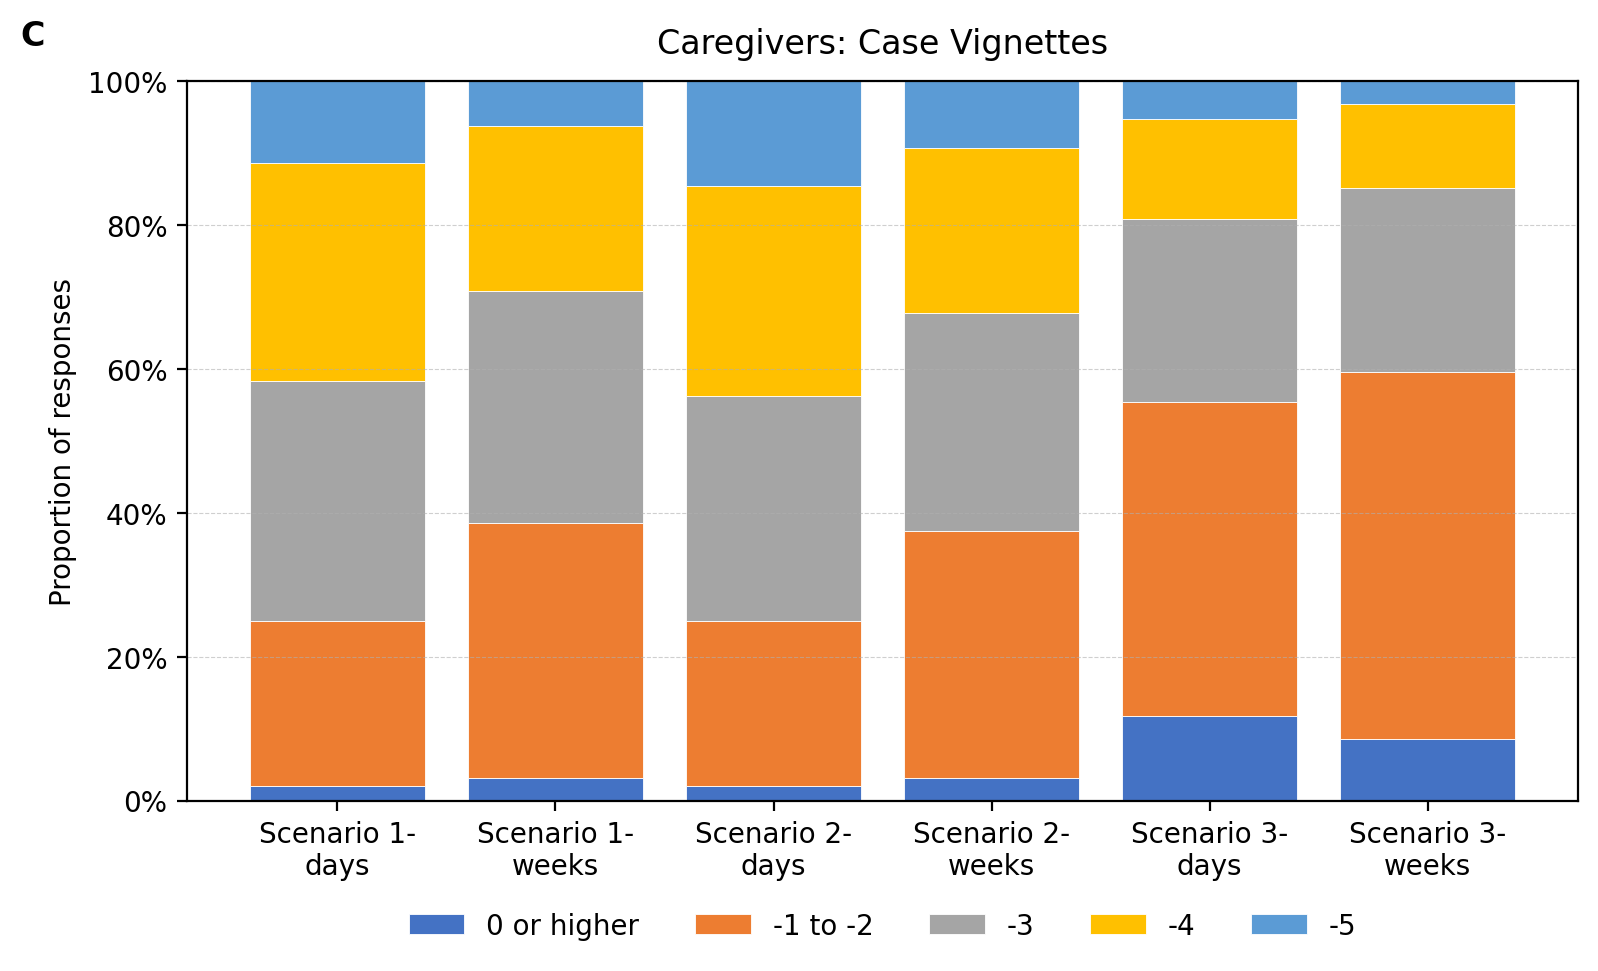

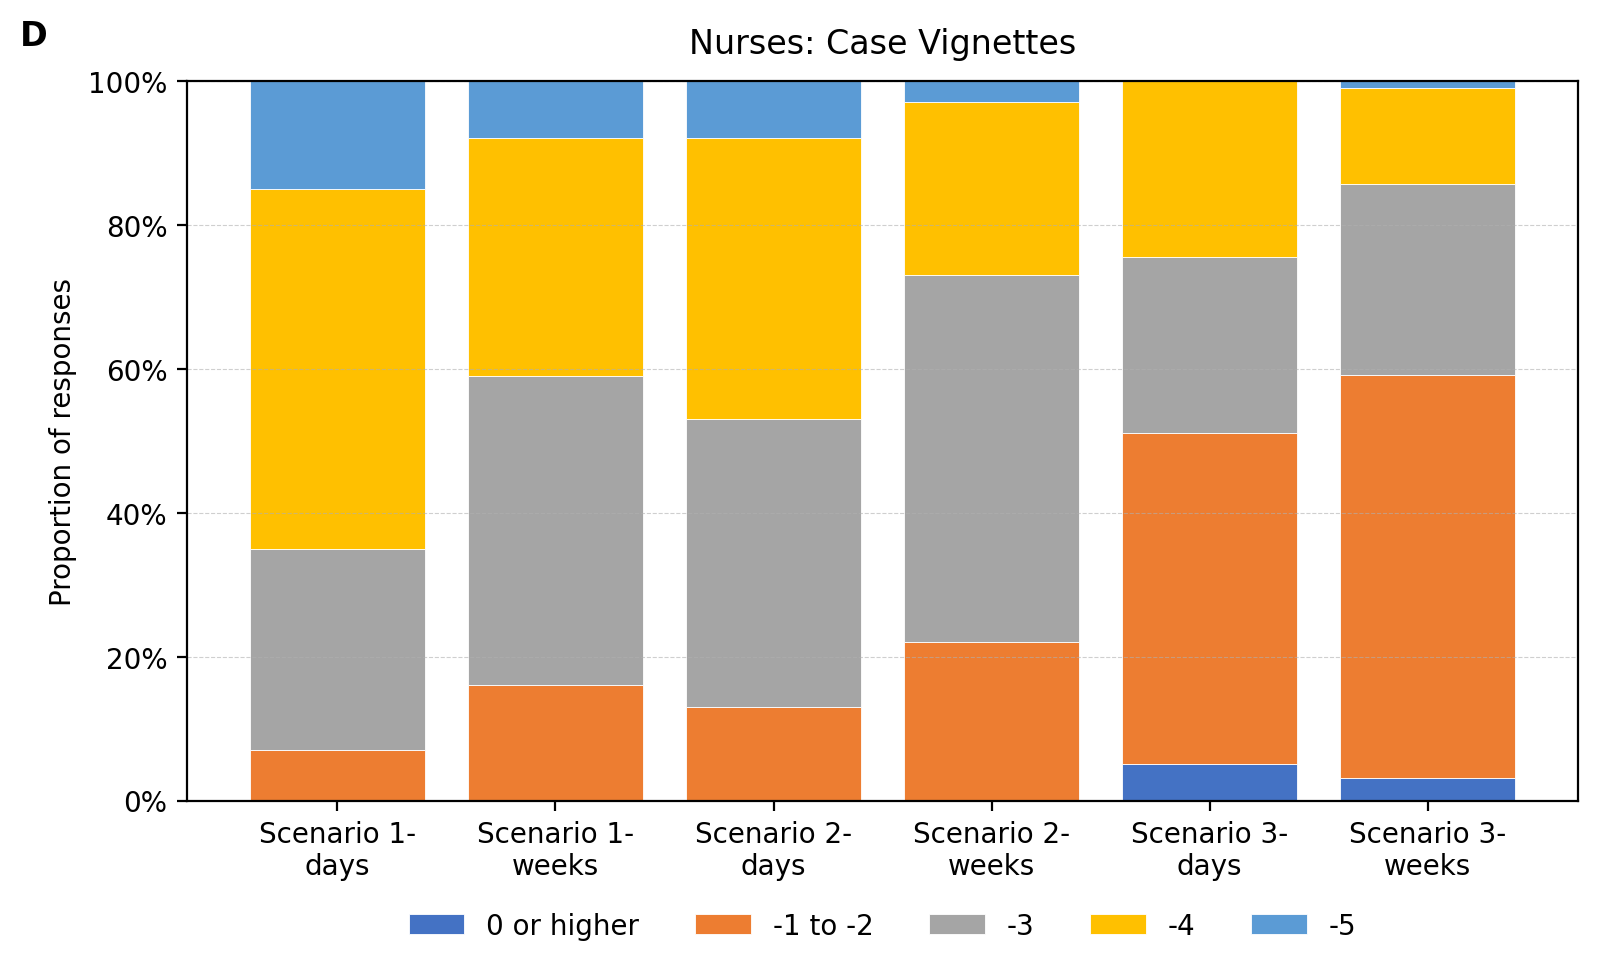

In [ ]:
# -*- coding: utf-8 -*-
# Google Colab script to plot Figure 1C (D) stacked bar charts (Caregivers / Nurses case vignettes)

import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# 1) Data from Table 3 (each column = scenario; each row = sedation level)
# ======================================================
levels = ["0 or higher", "-1 to -2", "-3", "-4", "-5"]

cg_data = np.array([
    [ 2,  3,  2,  3, 11,  8],   # 0 or higher
    [22, 34, 22, 33, 41, 48],   # -1 to -2
    [32, 31, 30, 29, 24, 24],   # -3
    [29, 22, 28, 22, 13, 11],   # -4
    [11,  6, 14,  9,  5,  3],   # -5
])

rn_data = np.array([
    [ 0,  0,  0,  0,  5,  3],   # 0 or higher
    [ 7, 16, 13, 22, 45, 55],   # -1 to -2
    [28, 43, 40, 51, 24, 26],   # -3
    [50, 33, 39, 24, 24, 13],   # -4
    [15,  8,  8,  3,  0,  1],   # -5
])

scenarios = ["Scenario 1-\ndays", "Scenario 1-\nweeks",
             "Scenario 2-\ndays", "Scenario 2-\nweeks",
             "Scenario 3-\ndays", "Scenario 3-\nweeks"]

# ======================================================
# 2) Normalize data so each column sums to 100%
# ======================================================
def normalize_columns(data):
    col_sums = data.sum(axis=0)
    # avoid divide-by-zero if any column sums to 0
    return (data / col_sums) * 100

cg_data = normalize_columns(cg_data)
rn_data = normalize_columns(rn_data)

# ======================================================
# 3) Color scheme (same as your sample figure)
# ======================================================
colors = {
    "0 or higher": "#4472C4",  # blue
    "-1 to -2": "#ED7D31",     # orange
    "-3": "#A5A5A5",           # gray
    "-4": "#FFC000",           # yellow
    "-5": "#5B9BD5",           # light blue
}

# ======================================================
# 4) Function to draw stacked bar chart
# ======================================================
def plot_stacked(data, title, letter_label, filename):
    fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
    x = np.arange(data.shape[1])
    bottom = np.zeros(data.shape[1])

    for i, level in enumerate(levels):
        ax.bar(x, data[i], bottom=bottom,
               color=colors[level],
               edgecolor="white", linewidth=0.3, label=level)
        bottom += data[i]

    # Axes formatting
    ax.set_xticks(x)
    ax.set_xticklabels(scenarios)
    ax.set_ylabel("Proportion of responses")
    ax.set_ylim(0, 100)
    ax.set_title(title, pad=10)
    ax.yaxis.set_major_formatter(lambda x, _: f"{int(x)}%")
    ax.grid(axis="y", linestyle="--", linewidth=0.4, alpha=0.6)

    # Panel letter outside frame
    ax.text(-0.12, 1.04, letter_label,
            transform=ax.transAxes,
            fontsize=12, fontweight="bold",
            va="bottom", ha="left")

    # Legend in proper left-to-right order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,
              loc="upper center", bbox_to_anchor=(0.5, -0.12),
              ncol=len(levels), frameon=False)

    plt.tight_layout()
    plt.show()
    fig.savefig(filename, dpi=600, bbox_inches="tight")

# ======================================================
# 5) Generate both charts (C & D)
# ======================================================
plot_stacked(cg_data, "Caregivers: Case Vignettes", "C",
             "C_caregivers_case_vignettes.png")
plot_stacked(rn_data, "Nurses: Case Vignettes", "D",
             "D_nurses_case_vignettes.png")

